<div style="font-weight: bold; color:#5D8AA8" align="center">
    <div style="font-size: xx-large">Advanced Course of Statistics</div><br>
    <div style="font-size: x-large; color:gray">Introduction to FDA with scikit-fda</div><br>
    <div style="font-size: large">José Luis Torrecilla Noguerales - Universidad Autónoma de Madrid</div><br></div><hr>
</div>

**Initial setting**: This cell defines the Notebook setting

In [3]:
%%html
<style>
    .qst {background-color: #b1cee3; padding:10px; border-radius: 5px; border: solid 2px #5D8AA8;}
    .qst:before {font-weight: bold; content: "Questions"; display: block; margin: 0px 10px 10px 10px;}
    h1, h2, h3 {color: #5D8AA8;}
    .text_cell_render p {text-align: justify; text-justify: inter-word;}
</style>

**Packages to use:**

In [2]:
import skfda
import matplotlib.pyplot as plt
import sklearn

# The class FDataGrid
## Defining the [FDataGrid](https://fda.readthedocs.io/en/latest/modules/autosummary/skfda.representation.grid.FDataGrid.html#skfda.representation.grid.FDataGrid)

The main attributes when defining dataset of discretized functional data are **grid_points** and **data_matrix** which stand for the array of discretization points $t_1,\ldots,t_M$, and the matrix with the values of the $N$ trajectories evaluated at the grid points (one observation per row).  the values of the trajectories at the grid points. 

Note that the grid points can be omitted, and in that case, they are automatically assigned as equispaced points in domain set.


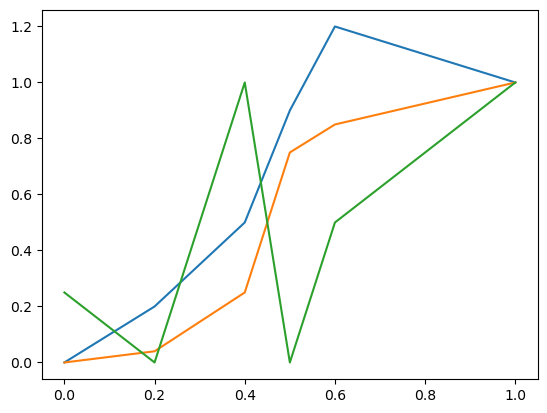

In [10]:
grid_points = [0.0, 0.2, 0.4, 0.5, 0.6, 1.0]  # Grid points of the curves
data_matrix = [
    [0.00, 0.20, 0.50, 0.90, 1.20, 1.00],  # First observation
    [0.00, 0.04, 0.25, 0.75, 0.85, 1.00],  # Second observation
    [0.25, 0.00, 1.00, 0.00, 0.50, 1.00],  # Second observation
]

fd = skfda.FDataGrid(
    grid_points=grid_points,
    data_matrix=data_matrix
)

fd.plot()
plt.show()

## Examples in higher dimensions

We will load the digits dataset from *scikit-learn*, which contains images of the digits from $0$ to $9$. This can be loaded with [load_digits](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits), returning a NumPy array. We can view this digits as surfaces, that is, functions $x(s,t):\mathbb{R}^2 \longrightarrow\mathbb{R}$. The problem is that the data has been flattened into a 1D vector of pixels, so first, we need to reshape them to their original 8x8 shape. 

In [11]:
#Directive to get interactive plots
#Package ipympl is needed. You need to install the package once with !pip install ipympl
%matplotlib widget 

ModuleNotFoundError: No module named 'ipympl'

In [ ]:
from sklearn.datasets import load_digits

X, y = load_digits(return_X_y=True)
print(X.shape)
X = X.reshape(-1, 8, 8)
print(X.shape)

fd = skfda.FDataGrid(X)

# Plot the first 2 observations
fd[0].plot()
plt.show()
fd[6].plot()
plt.show()

## Loading functional datasets: the fetch functions
### Common datasets

Some commonly used datasets have their own fetch functions. Here we explore **aemet**, wich consists of daily summaries from 73 spanish weather stations during the period 1980-2009. The dataset contains the geographic information of each station and the average for the period 1980-2009 of daily temperature, (log)precipitation and wind speed. This can be seen as an example o the so-called multivariate functional data.

In [ ]:
X, _ = skfda.datasets.fetch_aemet(return_X_y=True)

X.plot()
plt.show()

In [ ]:
X.coordinates[0].plot() #Selecting temperatures only
plt.show()

### Datasets from repositories

There are functional datasets in many repositories. Functions **fetch_cran** and **fetch_ucr** make it easy for us to access data in in the CRAN repository (R), and in the UEA & UCR Time Series Classification Repository repositories, respectively. Note these datasets do not follow a particular structure, so you will need to know how it is structured internally in order to use it properly.

In [ ]:
X, y = skfda.datasets.fetch_ucr("GunPoint", return_X_y=True)
X.plot(group=y)
plt.show()

## Generation of random trajectories
ddd

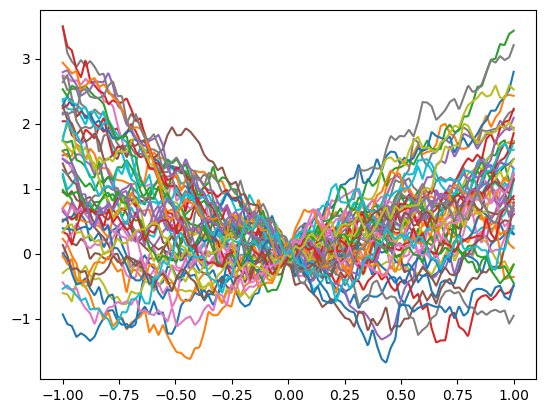

In [12]:
from skfda.misc.covariances import Brownian

fd = skfda.datasets.make_gaussian_process(
start = -1,                 #initial point
stop = 1,                   #final point
n_samples=50,               #sample size
n_features=100,             #number of variables/discretization points
mean=lambda t: t**2,        #mean function. lambda function f(t) = t^2
cov=Brownian(variance=1),   #covariance function
random_state=0              #seed
)

fd.plot() 
plt.show()

<div class="qst">

* Try to draw 10 trajectories of a standard Brownian motion.
    
    
* Do you know how to compute $5^2$ using lambda functions?
</div>

In [13]:
Brownian() #Interaction with jupyter (prototype)

skfda.misc.covariances.Brownian(variance=1, origin=0)

# The class FDataBasis
### From FDataGrid to FDataBasis
The method **tp_basis()** transform FDataGrid objects to a basis representation (FDataBasis). The desired basis must be passed as an argument.  you will need to call the method to_basis, passing the desired basis as an argument. The discretized trajectories will be projected to the functional basis by solving a least squares problem in order to find the optimal coefficients of the expansion. 
The reciprocal action can be dan with **to_grid**. This method evaluates the functions in a grid supplied as an argument.

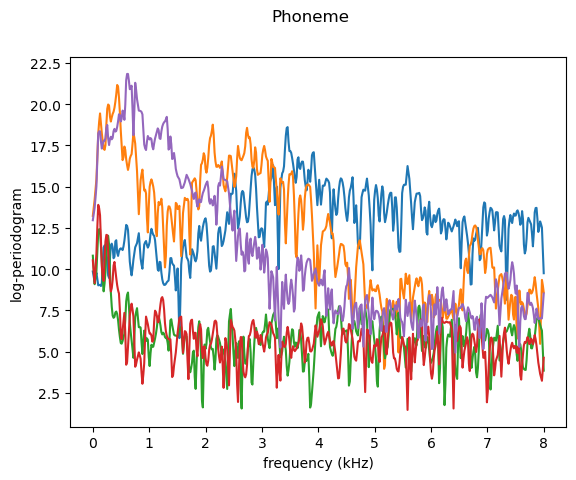

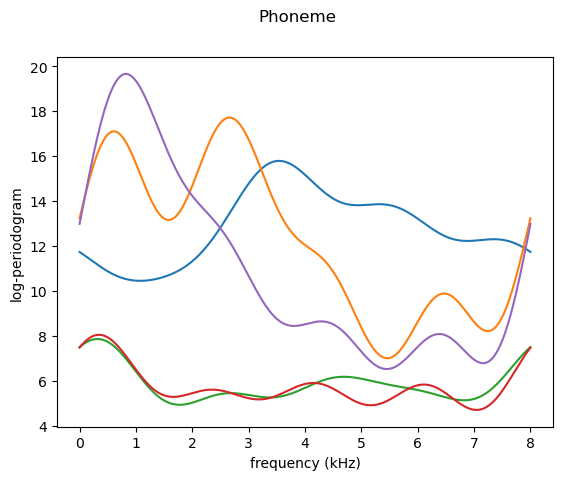

In [16]:
X, y = skfda.datasets.fetch_phoneme(return_X_y=True)


X = X[:5] # Select only the first 5 observations

X.plot()

basis = skfda.representation.basis.FourierBasis(n_basis=n_basis)
X.to_basis(basis).plot()
plt.show()

<div class="qst">

* Explore the effect of varying the number of elements in the basis and the type of basis.
</div>